In [1]:
import pandas as pd

In [17]:
data = pd.read_csv("centroids_400_36p.dat", header=None)
data

In [47]:
import numpy as np

def plot_schaefer_on_fslr(data_schaefer400_signif, label_text, cmap="coolwarm_r"): #data_schaefer400, 
    from netneurotools.datasets import fetch_schaefer2018
    from neuromaps.images import dlabel_to_gifti
    from neuromaps.parcellate import Parcellater
    from brainspace.datasets import load_parcellation

    schaefer = fetch_schaefer2018('fslr32k')['400Parcels7Networks']

    from neuromaps.datasets import fetch_fslr
    from surfplot import Plot

    surfaces = fetch_fslr()
    lh, rh = surfaces['inflated']
    p = Plot(lh, rh, zoom=1.2,
             brightness=1, mirror_views=True)

    parc = Parcellater(dlabel_to_gifti(schaefer), 'fsLR', resampling_target="data")
    data_fslr_signif = parc.inverse_transform(data_schaefer400_signif)
    lh_parc, rh_parc = load_parcellation('schaefer')

    lh_sulc, rh_sulc = surfaces['sulc']
    p.add_layer({'left': lh_sulc, 'right': rh_sulc}, cmap='binary_r', cbar=False, alpha=0.7)

    p.add_layer({"left":data_fslr_signif[0],"right":data_fslr_signif[1]}, cmap=cmap, 
                cbar_label= r'$z$', color_range=None, alpha=0.9)

    p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray',
            as_outline=True, cbar=False)

    kws = {'location': 'right', 'decimals': 1, 'label_direction': 0,
        'fontsize': 10, 'n_ticks': 2, 'shrink': .4, 'aspect': 10,
        'draw_border': True}
    fig = p.build(cbar_kws=kws)

    return fig

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


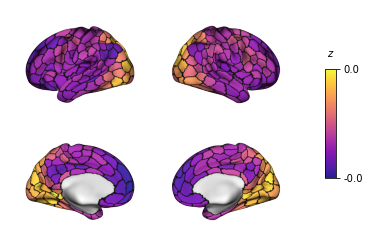

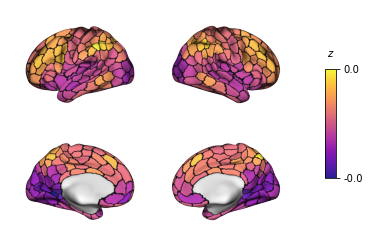

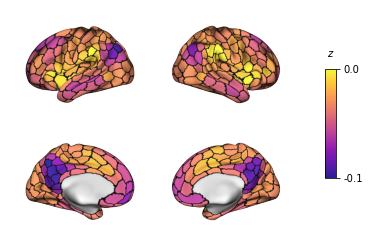

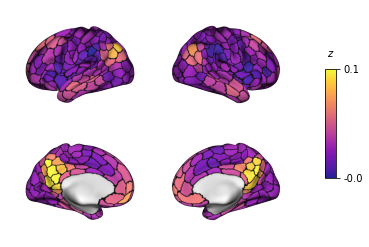

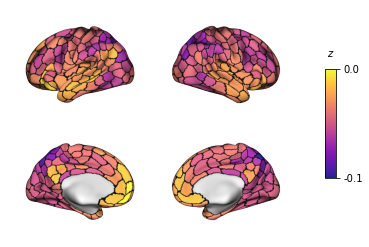

In [51]:
cmap = "plasma"

for row in data.iterrows():
    k = row[0]
    v = row[1].values

    plot = plot_schaefer_on_fslr(
        data_schaefer400_signif=v, 
        label_text="", 
        cmap=cmap)
    plot.savefig(f"surfplot_{k}.png", dpi=300)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


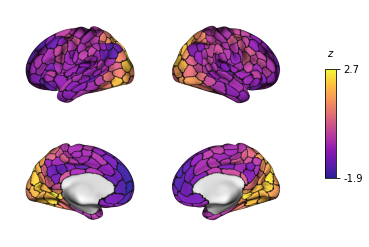

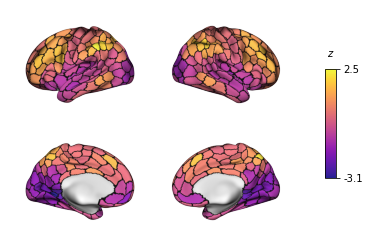

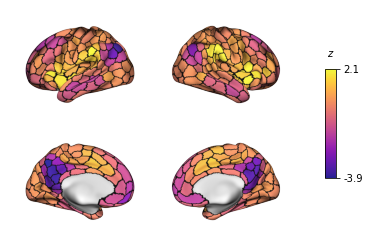

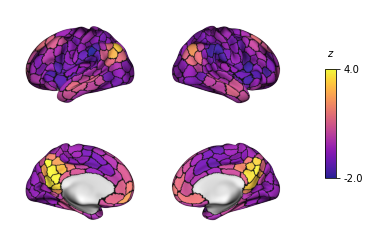

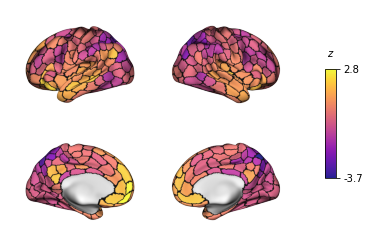

In [53]:
from scipy.stats import zscore

cmap = "plasma"

for row in data.iterrows():
    k = row[0]
    v = row[1].values

    v = zscore(v)

    plot = plot_schaefer_on_fslr(
        data_schaefer400_signif=v, 
        #data_schaefer400=result_dict_cortex[k].values.flatten(), 
        label_text="", 
        cmap=cmap)
    plot.savefig(f"surfplot_{k}_z.png", dpi=300)